In [ ]:
#*****************************************************************************
#
#               Microsoft Power BI Para Data Science, Versão 2.0
#
#                               Data Science Academy
#
#                                   Mini-Projeto 3
#       
#         Prevendo a Inadimplência de Clientes com Machine Learning e Power BI
#
#*****************************************************************************

# Introdução

Esta pesquisa é voltada para o caso de inadimplência de clientes em Taiwan.

Os detalhes e o dataset podem ser acessados pelo link: https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

In [ ]:
#Montando a pasta raiz do Google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Carregando o R magic
%load_ext rpy2.ipython

In [ ]:
#Ativando o R magic e carregando os dados.
%%R
url = ('/content/drive/MyDrive/Data science academy/Curso Power BI para data science/dataset.csv')
dados_clientes = read.csv(url)

In [ ]:
#Instalando os pacotes para o projeto.
%%R
install.packages("Amelia")
install.packages("caret")
install.packages("ggplot2")
install.packages("dplyr")
install.packages("reshape")
install.packages("randomForest")
install.packages("e1071")

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: also installing the dependency ‘RcppArmadillo’


R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/RcppArmadillo_0.10.8.1.0.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 1364404 bytes (1.3 MB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to conso

In [ ]:
# Carregando os pacotes 
%%R
library(Amelia)
library(ggplot2)
library(caret)
library(reshape)
library(randomForest)
library(dplyr)
library(e1071)

R[write to console]: Loading required package: Rcpp

R[write to console]: ## 
## Amelia II: Multiple Imputation
## (Version 1.8.0, built: 2021-05-26)
## Copyright (C) 2005-2022 James Honaker, Gary King and Matthew Blackwell
## Refer to http://gking.harvard.edu/amelia/ for more information
## 

R[write to console]: Loading required package: lattice

R[write to console]: randomForest 4.7-1

R[write to console]: Type rfNews() to see new features/changes/bug fixes.

R[write to console]: 
Attaching package: ‘randomForest’


R[write to console]: The following object is masked from ‘package:ggplot2’:

    margin


R[write to console]: 
Attaching package: ‘dplyr’


R[write to console]: The following object is masked from ‘package:randomForest’:

    combine


R[write to console]: The following object is masked from ‘package:reshape’:

    rename


R[write to console]: The following objects are masked from ‘package:stats’:

    filter, lag


R[write to console]: The following objects are masked

In [ ]:
# Visualizando os dados e sua estrutura
%%R
dim(dados_clientes)

[1] 30000    25


Nesse dataset temos 30000 linhas e 25 colunas.

In [ ]:
%%R
head(dados_clientes)

  ID LIMIT_BAL SEX EDUCATION MARRIAGE AGE PAY_0 PAY_2 PAY_3 PAY_4 PAY_5 PAY_6
1  1     20000   2         2        1  24     2     2    -1    -1    -2    -2
2  2    120000   2         2        2  26    -1     2     0     0     0     2
3  3     90000   2         2        2  34     0     0     0     0     0     0
4  4     50000   2         2        1  37     0     0     0     0     0     0
5  5     50000   1         2        1  57    -1     0    -1     0     0     0
6  6     50000   1         1        2  37     0     0     0     0     0     0
  BILL_AMT1 BILL_AMT2 BILL_AMT3 BILL_AMT4 BILL_AMT5 BILL_AMT6 PAY_AMT1 PAY_AMT2
1      3913      3102       689         0         0         0        0      689
2      2682      1725      2682      3272      3455      3261        0     1000
3     29239     14027     13559     14331     14948     15549     1518     1500
4     46990     48233     49291     28314     28959     29547     2000     2019
5      8617      5670     35835     20940     19146   

In [ ]:
%%R
str(dados_clientes) 

'data.frame':	30000 obs. of  25 variables:
 $ ID                        : int  1 2 3 4 5 6 7 8 9 10 ...
 $ LIMIT_BAL                 : int  20000 120000 90000 50000 50000 50000 500000 100000 140000 20000 ...
 $ SEX                       : int  2 2 2 2 1 1 1 2 2 1 ...
 $ EDUCATION                 : int  2 2 2 2 2 1 1 2 3 3 ...
 $ MARRIAGE                  : int  1 2 2 1 1 2 2 2 1 2 ...
 $ AGE                       : int  24 26 34 37 57 37 29 23 28 35 ...
 $ PAY_0                     : int  2 -1 0 0 -1 0 0 0 0 -2 ...
 $ PAY_2                     : int  2 2 0 0 0 0 0 -1 0 -2 ...
 $ PAY_3                     : int  -1 0 0 0 -1 0 0 -1 2 -2 ...
 $ PAY_4                     : int  -1 0 0 0 0 0 0 0 0 -2 ...
 $ PAY_5                     : int  -2 0 0 0 0 0 0 0 0 -1 ...
 $ PAY_6                     : int  -2 2 0 0 0 0 0 -1 0 -1 ...
 $ BILL_AMT1                 : int  3913 2682 29239 46990 8617 64400 367965 11876 11285 0 ...
 $ BILL_AMT2                 : int  3102 1725 14027 48233 5670 57069 412

Todas as variáveis foram identificadas como inteiras.

Verificamos os nomes das colunas acima. As descrições são as seguintes:

ID: Id do cliente.

LIMIT_BAL: Limite de credito disponível pra o cliente.

SEX: Gênero, onde 1 e masculino e 2 e feminino.

EDUCATION: Graduação do cliente(1-pos-graduado, 2-universitário, 3-ensino médio, 4-outros.

MARRIAGE: estado civil(1-casado, 2-solteiro, 3-outros).

AGE: Idade.

PAY_0 ate PAY_6: Histórico de pagamentos anteriores(-1-Fez o pagamento, 1-Fez  pagamento com 1 mês de atraso, 2-Fez o pagamento com 2 meses de atraso, 9-Fez o pagamento com  meses de atraso).

BILL_AMT1 ate BILL_AMT6: Valores a serem pagos das faturas.

PAY_AMT1 ate PAY_AMT6: Valores pagos das faturas.

default.payment.nex.month: Indica se a pessoa pagou a fatura(0-não pagou, 1-pagou).


In [ ]:
%%R
summary(dados_clientes)

       ID          LIMIT_BAL            SEX          EDUCATION    
 Min.   :    1   Min.   :  10000   Min.   :1.000   Min.   :0.000  
 1st Qu.: 7501   1st Qu.:  50000   1st Qu.:1.000   1st Qu.:1.000  
 Median :15000   Median : 140000   Median :2.000   Median :2.000  
 Mean   :15000   Mean   : 167484   Mean   :1.604   Mean   :1.853  
 3rd Qu.:22500   3rd Qu.: 240000   3rd Qu.:2.000   3rd Qu.:2.000  
 Max.   :30000   Max.   :1000000   Max.   :2.000   Max.   :6.000  
    MARRIAGE          AGE            PAY_0             PAY_2        
 Min.   :0.000   Min.   :21.00   Min.   :-2.0000   Min.   :-2.0000  
 1st Qu.:1.000   1st Qu.:28.00   1st Qu.:-1.0000   1st Qu.:-1.0000  
 Median :2.000   Median :34.00   Median : 0.0000   Median : 0.0000  
 Mean   :1.552   Mean   :35.49   Mean   :-0.0167   Mean   :-0.1338  
 3rd Qu.:2.000   3rd Qu.:41.00   3rd Qu.: 0.0000   3rd Qu.: 0.0000  
 Max.   :3.000   Max.   :79.00   Max.   : 8.0000   Max.   : 8.0000  
     PAY_3             PAY_4             PAY_5  

In [ ]:
#################### Análise Exploratória, Limpeza e Transformação ####################

In [ ]:
# Removendo a primeira coluna ID
%%R
dados_clientes$ID <- NULL

In [ ]:
%%R
dim(dados_clientes)

[1] 30000    24


In [ ]:
%%R
head(dados_clientes)

  LIMIT_BAL SEX EDUCATION MARRIAGE AGE PAY_0 PAY_2 PAY_3 PAY_4 PAY_5 PAY_6
1     20000   2         2        1  24     2     2    -1    -1    -2    -2
2    120000   2         2        2  26    -1     2     0     0     0     2
3     90000   2         2        2  34     0     0     0     0     0     0
4     50000   2         2        1  37     0     0     0     0     0     0
5     50000   1         2        1  57    -1     0    -1     0     0     0
6     50000   1         1        2  37     0     0     0     0     0     0
  BILL_AMT1 BILL_AMT2 BILL_AMT3 BILL_AMT4 BILL_AMT5 BILL_AMT6 PAY_AMT1 PAY_AMT2
1      3913      3102       689         0         0         0        0      689
2      2682      1725      2682      3272      3455      3261        0     1000
3     29239     14027     13559     14331     14948     15549     1518     1500
4     46990     48233     49291     28314     28959     29547     2000     2019
5      8617      5670     35835     20940     19146     19131     2000    3

In [ ]:
# Renomeando a coluna de classe
%%R
colnames(dados_clientes)

 [1] "LIMIT_BAL"                  "SEX"                       
 [3] "EDUCATION"                  "MARRIAGE"                  
 [5] "AGE"                        "PAY_0"                     
 [7] "PAY_2"                      "PAY_3"                     
 [9] "PAY_4"                      "PAY_5"                     
[11] "PAY_6"                      "BILL_AMT1"                 
[13] "BILL_AMT2"                  "BILL_AMT3"                 
[15] "BILL_AMT4"                  "BILL_AMT5"                 
[17] "BILL_AMT6"                  "PAY_AMT1"                  
[19] "PAY_AMT2"                   "PAY_AMT3"                  
[21] "PAY_AMT4"                   "PAY_AMT5"                  
[23] "PAY_AMT6"                   "default.payment.next.month"


In [ ]:
%%R
colnames(dados_clientes)[24] <- "inadimplente"

In [ ]:
%%R
colnames(dados_clientes)

 [1] "LIMIT_BAL"    "SEX"          "EDUCATION"    "MARRIAGE"     "AGE"         
 [6] "PAY_0"        "PAY_2"        "PAY_3"        "PAY_4"        "PAY_5"       
[11] "PAY_6"        "BILL_AMT1"    "BILL_AMT2"    "BILL_AMT3"    "BILL_AMT4"   
[16] "BILL_AMT5"    "BILL_AMT6"    "PAY_AMT1"     "PAY_AMT2"     "PAY_AMT3"    
[21] "PAY_AMT4"     "PAY_AMT5"     "PAY_AMT6"     "inadimplente"


In [ ]:
%%R
head(dados_clientes)

  LIMIT_BAL SEX EDUCATION MARRIAGE AGE PAY_0 PAY_2 PAY_3 PAY_4 PAY_5 PAY_6
1     20000   2         2        1  24     2     2    -1    -1    -2    -2
2    120000   2         2        2  26    -1     2     0     0     0     2
3     90000   2         2        2  34     0     0     0     0     0     0
4     50000   2         2        1  37     0     0     0     0     0     0
5     50000   1         2        1  57    -1     0    -1     0     0     0
6     50000   1         1        2  37     0     0     0     0     0     0
  BILL_AMT1 BILL_AMT2 BILL_AMT3 BILL_AMT4 BILL_AMT5 BILL_AMT6 PAY_AMT1 PAY_AMT2
1      3913      3102       689         0         0         0        0      689
2      2682      1725      2682      3272      3455      3261        0     1000
3     29239     14027     13559     14331     14948     15549     1518     1500
4     46990     48233     49291     28314     28959     29547     2000     2019
5      8617      5670     35835     20940     19146     19131     2000    3

In [ ]:
# Verificando valores ausentes e removendo do dataset
%%R
sapply(dados_clientes, function(x) sum(is.na(x)))

   LIMIT_BAL          SEX    EDUCATION     MARRIAGE          AGE        PAY_0 
           0            0            0            0            0            0 
       PAY_2        PAY_3        PAY_4        PAY_5        PAY_6    BILL_AMT1 
           0            0            0            0            0            0 
   BILL_AMT2    BILL_AMT3    BILL_AMT4    BILL_AMT5    BILL_AMT6     PAY_AMT1 
           0            0            0            0            0            0 
    PAY_AMT2     PAY_AMT3     PAY_AMT4     PAY_AMT5     PAY_AMT6 inadimplente 
           0            0            0            0            0            0 


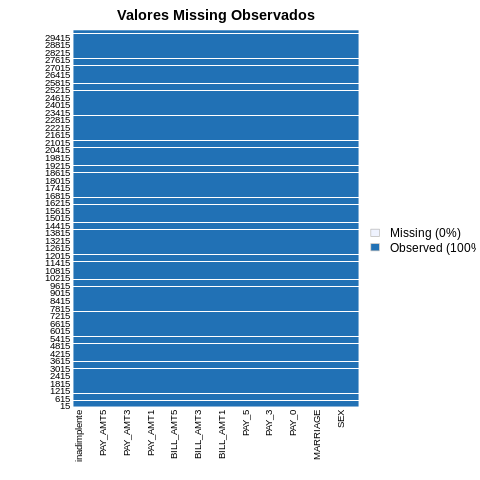

In [ ]:
%%R
missmap(dados_clientes, main = "Valores Missing Observados")

Não foram encontrados valores ausentes.

In [ ]:
# Convertendo os atributos genero, escolaridade, estado civil e idade 
# para fatores (categorias)
%%R
str(dados_clientes) 

'data.frame':	30000 obs. of  24 variables:
 $ LIMIT_BAL   : int  20000 120000 90000 50000 50000 50000 500000 100000 140000 20000 ...
 $ SEX         : int  2 2 2 2 1 1 1 2 2 1 ...
 $ EDUCATION   : int  2 2 2 2 2 1 1 2 3 3 ...
 $ MARRIAGE    : int  1 2 2 1 1 2 2 2 1 2 ...
 $ AGE         : int  24 26 34 37 57 37 29 23 28 35 ...
 $ PAY_0       : int  2 -1 0 0 -1 0 0 0 0 -2 ...
 $ PAY_2       : int  2 2 0 0 0 0 0 -1 0 -2 ...
 $ PAY_3       : int  -1 0 0 0 -1 0 0 -1 2 -2 ...
 $ PAY_4       : int  -1 0 0 0 0 0 0 0 0 -2 ...
 $ PAY_5       : int  -2 0 0 0 0 0 0 0 0 -1 ...
 $ PAY_6       : int  -2 2 0 0 0 0 0 -1 0 -1 ...
 $ BILL_AMT1   : int  3913 2682 29239 46990 8617 64400 367965 11876 11285 0 ...
 $ BILL_AMT2   : int  3102 1725 14027 48233 5670 57069 412023 380 14096 0 ...
 $ BILL_AMT3   : int  689 2682 13559 49291 35835 57608 445007 601 12108 0 ...
 $ BILL_AMT4   : int  0 3272 14331 28314 20940 19394 542653 221 12211 0 ...
 $ BILL_AMT5   : int  0 3455 14948 28959 19146 19619 483003 -159 1179

In [ ]:
# Renomeando colunas categóricas
%%R
colnames(dados_clientes)

 [1] "LIMIT_BAL"    "SEX"          "EDUCATION"    "MARRIAGE"     "AGE"         
 [6] "PAY_0"        "PAY_2"        "PAY_3"        "PAY_4"        "PAY_5"       
[11] "PAY_6"        "BILL_AMT1"    "BILL_AMT2"    "BILL_AMT3"    "BILL_AMT4"   
[16] "BILL_AMT5"    "BILL_AMT6"    "PAY_AMT1"     "PAY_AMT2"     "PAY_AMT3"    
[21] "PAY_AMT4"     "PAY_AMT5"     "PAY_AMT6"     "inadimplente"


In [ ]:
%%R
colnames(dados_clientes)[2] <- "Genero"
colnames(dados_clientes)[3] <- "Escolaridade"
colnames(dados_clientes)[4] <- "Estado_Civil"
colnames(dados_clientes)[5] <- "Idade"

In [ ]:
%%R
colnames(dados_clientes)

 [1] "LIMIT_BAL"    "Genero"       "Escolaridade" "Estado_Civil" "Idade"       
 [6] "PAY_0"        "PAY_2"        "PAY_3"        "PAY_4"        "PAY_5"       
[11] "PAY_6"        "BILL_AMT1"    "BILL_AMT2"    "BILL_AMT3"    "BILL_AMT4"   
[16] "BILL_AMT5"    "BILL_AMT6"    "PAY_AMT1"     "PAY_AMT2"     "PAY_AMT3"    
[21] "PAY_AMT4"     "PAY_AMT5"     "PAY_AMT6"     "inadimplente"


In [ ]:
%%R
head(dados_clientes)

  LIMIT_BAL Genero Escolaridade Estado_Civil Idade PAY_0 PAY_2 PAY_3 PAY_4
1     20000      2            2            1    24     2     2    -1    -1
2    120000      2            2            2    26    -1     2     0     0
3     90000      2            2            2    34     0     0     0     0
4     50000      2            2            1    37     0     0     0     0
5     50000      1            2            1    57    -1     0    -1     0
6     50000      1            1            2    37     0     0     0     0
  PAY_5 PAY_6 BILL_AMT1 BILL_AMT2 BILL_AMT3 BILL_AMT4 BILL_AMT5 BILL_AMT6
1    -2    -2      3913      3102       689         0         0         0
2     0     2      2682      1725      2682      3272      3455      3261
3     0     0     29239     14027     13559     14331     14948     15549
4     0     0     46990     48233     49291     28314     28959     29547
5     0     0      8617      5670     35835     20940     19146     19131
6     0     0     64400     570

In [ ]:
# Genero
%%R
head(dados_clientes$Genero) 

[1] 2 2 2 2 1 1


In [ ]:
%%R
str(dados_clientes$Genero) 

 int [1:30000] 2 2 2 2 1 1 1 2 2 1 ...


In [ ]:
%%R
summary(dados_clientes$Genero) 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.000   2.000   1.604   2.000   2.000 


In [ ]:
%%R
dados_clientes$Genero <- cut(dados_clientes$Genero, 
                             c(0,1,2), 
                             labels = c("Masculino",
                                        "Feminino"))

In [ ]:
%%R
head(dados_clientes$Genero) 

[1] Feminino  Feminino  Feminino  Feminino  Masculino Masculino
Levels: Masculino Feminino


In [ ]:
%%R
str(dados_clientes$Genero) 

 Factor w/ 2 levels "Masculino","Feminino": 2 2 2 2 1 1 1 2 2 1 ...


In [ ]:
%%R
summary(dados_clientes$Genero) 

Masculino  Feminino 
    11888     18112 


In [ ]:
# Escolaridade
%%R
str(dados_clientes$Escolaridade)

 int [1:30000] 2 2 2 2 2 1 1 2 3 3 ...


In [ ]:
%%R
summary(dados_clientes$Escolaridade) 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   1.000   2.000   1.853   2.000   6.000 


In [ ]:
%%R
dados_clientes$Escolaridade <- cut(dados_clientes$Escolaridade, 
                                   c(0,1,2,3,4), 
                                   labels = c("Pos Graduado",
                                              "Graduado",
                                              "Ensino Medio",
                                              "Outros"))

In [ ]:
%%R
head(dados_clientes$Escolaridade) 

[1] Graduado     Graduado     Graduado     Graduado     Graduado    
[6] Pos Graduado
Levels: Pos Graduado Graduado Ensino Medio Outros


In [ ]:
%%R
str(dados_clientes$Escolaridade) 

 Factor w/ 4 levels "Pos Graduado",..: 2 2 2 2 2 1 1 2 3 3 ...


In [ ]:
%%R
summary(dados_clientes$Escolaridade) 

Pos Graduado     Graduado Ensino Medio       Outros         NA's 
       10585        14030         4917          123          345 


In [ ]:
# Estado Civil
%%R
str(dados_clientes$Estado_Civil)

 int [1:30000] 1 2 2 1 1 2 2 2 1 2 ...


In [ ]:
%%R
summary(dados_clientes$Estado_Civil) 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   1.000   2.000   1.552   2.000   3.000 


In [ ]:
%%R
dados_clientes$Estado_Civil <- cut(dados_clientes$Estado_Civil, 
                                   c(-1,0,1,2,3),
                                   labels = c("Desconhecido",
                                              "Casado",
                                              "Solteiro",
                                              "Outro"))

In [ ]:
%%R
head(dados_clientes$Estado_Civil)

[1] Casado   Solteiro Solteiro Casado   Casado   Solteiro
Levels: Desconhecido Casado Solteiro Outro


In [ ]:
%%R
str(dados_clientes$Estado_Civil) 

 Factor w/ 4 levels "Desconhecido",..: 2 3 3 2 2 3 3 3 2 3 ...


In [ ]:
%%R
summary(dados_clientes$Estado_Civil) 

Desconhecido       Casado     Solteiro        Outro 
          54        13659        15964          323 


In [ ]:
# Convertendo a variável para o tipo fator com faixa etária
%%R
str(dados_clientes$Idade)

 int [1:30000] 24 26 34 37 57 37 29 23 28 35 ...


In [ ]:
%%R
summary(dados_clientes$Idade) 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  21.00   28.00   34.00   35.49   41.00   79.00 


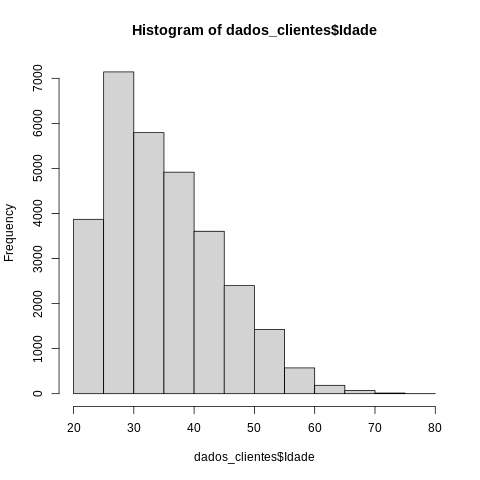

In [ ]:
%%R
hist(dados_clientes$Idade)

In [ ]:
%%R
dados_clientes$Idade <- cut(dados_clientes$Idade, 
                            c(0,30,50,100), 
                            labels = c("Jovem", 
                                       "Adulto", 
                                       "Idoso"))

In [ ]:
%%R
head(dados_clientes$Idade) 

[1] Jovem  Jovem  Adulto Adulto Idoso  Adulto
Levels: Jovem Adulto Idoso


In [ ]:
%%R
str(dados_clientes$Idade) 

 Factor w/ 3 levels "Jovem","Adulto",..: 1 1 2 2 3 2 1 1 1 2 ...


In [ ]:
%%R
summary(dados_clientes$Idade)

 Jovem Adulto  Idoso 
 11013  16718   2269 


In [ ]:
%%R
head(dados_clientes)

  LIMIT_BAL    Genero Escolaridade Estado_Civil  Idade PAY_0 PAY_2 PAY_3 PAY_4
1     20000  Feminino     Graduado       Casado  Jovem     2     2    -1    -1
2    120000  Feminino     Graduado     Solteiro  Jovem    -1     2     0     0
3     90000  Feminino     Graduado     Solteiro Adulto     0     0     0     0
4     50000  Feminino     Graduado       Casado Adulto     0     0     0     0
5     50000 Masculino     Graduado       Casado  Idoso    -1     0    -1     0
6     50000 Masculino Pos Graduado     Solteiro Adulto     0     0     0     0
  PAY_5 PAY_6 BILL_AMT1 BILL_AMT2 BILL_AMT3 BILL_AMT4 BILL_AMT5 BILL_AMT6
1    -2    -2      3913      3102       689         0         0         0
2     0     2      2682      1725      2682      3272      3455      3261
3     0     0     29239     14027     13559     14331     14948     15549
4     0     0     46990     48233     49291     28314     28959     29547
5     0     0      8617      5670     35835     20940     19146     19131
6  

In [ ]:
# Convertendo a variável que indica pagamentos para o tipo fator
%%R
dados_clientes$PAY_0 <- as.factor(dados_clientes$PAY_0)
dados_clientes$PAY_2 <- as.factor(dados_clientes$PAY_2)
dados_clientes$PAY_3 <- as.factor(dados_clientes$PAY_3)
dados_clientes$PAY_4 <- as.factor(dados_clientes$PAY_4)
dados_clientes$PAY_5 <- as.factor(dados_clientes$PAY_5)
dados_clientes$PAY_6 <- as.factor(dados_clientes$PAY_6)

In [ ]:
# Dataset após as conversões
%%R
str(dados_clientes) 

'data.frame':	30000 obs. of  24 variables:
 $ LIMIT_BAL   : int  20000 120000 90000 50000 50000 50000 500000 100000 140000 20000 ...
 $ Genero      : Factor w/ 2 levels "Masculino","Feminino": 2 2 2 2 1 1 1 2 2 1 ...
 $ Escolaridade: Factor w/ 4 levels "Pos Graduado",..: 2 2 2 2 2 1 1 2 3 3 ...
 $ Estado_Civil: Factor w/ 4 levels "Desconhecido",..: 2 3 3 2 2 3 3 3 2 3 ...
 $ Idade       : Factor w/ 3 levels "Jovem","Adulto",..: 1 1 2 2 3 2 1 1 1 2 ...
 $ PAY_0       : Factor w/ 11 levels "-2","-1","0",..: 5 2 3 3 2 3 3 3 3 1 ...
 $ PAY_2       : Factor w/ 11 levels "-2","-1","0",..: 5 5 3 3 3 3 3 2 3 1 ...
 $ PAY_3       : Factor w/ 11 levels "-2","-1","0",..: 2 3 3 3 2 3 3 2 5 1 ...
 $ PAY_4       : Factor w/ 11 levels "-2","-1","0",..: 2 3 3 3 3 3 3 3 3 1 ...
 $ PAY_5       : Factor w/ 10 levels "-2","-1","0",..: 1 3 3 3 3 3 3 3 3 2 ...
 $ PAY_6       : Factor w/ 10 levels "-2","-1","0",..: 1 4 3 3 3 3 3 2 3 2 ...
 $ BILL_AMT1   : int  3913 2682 29239 46990 8617 64400 367965 11876 11

In [ ]:
%%R
sapply(dados_clientes, function(x) sum(is.na(x)))

   LIMIT_BAL       Genero Escolaridade Estado_Civil        Idade        PAY_0 
           0            0          345            0            0            0 
       PAY_2        PAY_3        PAY_4        PAY_5        PAY_6    BILL_AMT1 
           0            0            0            0            0            0 
   BILL_AMT2    BILL_AMT3    BILL_AMT4    BILL_AMT5    BILL_AMT6     PAY_AMT1 
           0            0            0            0            0            0 
    PAY_AMT2     PAY_AMT3     PAY_AMT4     PAY_AMT5     PAY_AMT6 inadimplente 
           0            0            0            0            0            0 


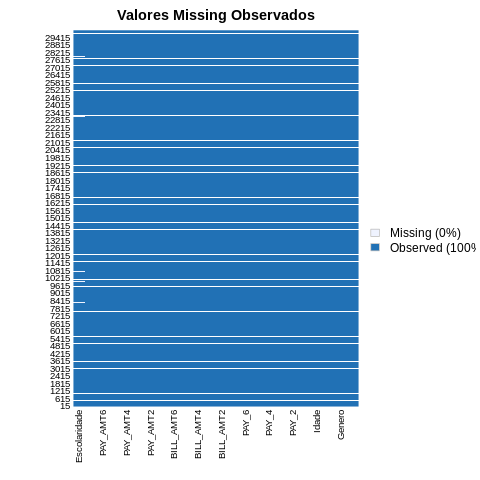

In [ ]:
%%R
missmap(dados_clientes, main = "Valores Missing Observados")

In [ ]:
%%R
dados_clientes <- na.omit(dados_clientes)

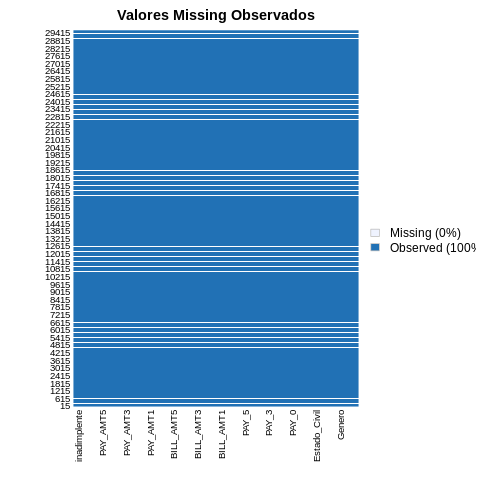

In [ ]:
%%R
missmap(dados_clientes, main = "Valores Missing Observados")

In [ ]:
%%R
dim(dados_clientes)

[1] 29655    24


In [ ]:
%%R
head(dados_clientes)

  LIMIT_BAL    Genero Escolaridade Estado_Civil  Idade PAY_0 PAY_2 PAY_3 PAY_4
1     20000  Feminino     Graduado       Casado  Jovem     2     2    -1    -1
2    120000  Feminino     Graduado     Solteiro  Jovem    -1     2     0     0
3     90000  Feminino     Graduado     Solteiro Adulto     0     0     0     0
4     50000  Feminino     Graduado       Casado Adulto     0     0     0     0
5     50000 Masculino     Graduado       Casado  Idoso    -1     0    -1     0
6     50000 Masculino Pos Graduado     Solteiro Adulto     0     0     0     0
  PAY_5 PAY_6 BILL_AMT1 BILL_AMT2 BILL_AMT3 BILL_AMT4 BILL_AMT5 BILL_AMT6
1    -2    -2      3913      3102       689         0         0         0
2     0     2      2682      1725      2682      3272      3455      3261
3     0     0     29239     14027     13559     14331     14948     15549
4     0     0     46990     48233     49291     28314     28959     29547
5     0     0      8617      5670     35835     20940     19146     19131
6  

In [ ]:
# Alterando a variável dependente para o tipo fator
%%R
str(dados_clientes$inadimplente)

 int [1:29655] 1 1 0 0 0 0 0 0 0 0 ...


In [ ]:
%%R
colnames(dados_clientes)

 [1] "LIMIT_BAL"    "Genero"       "Escolaridade" "Estado_Civil" "Idade"       
 [6] "PAY_0"        "PAY_2"        "PAY_3"        "PAY_4"        "PAY_5"       
[11] "PAY_6"        "BILL_AMT1"    "BILL_AMT2"    "BILL_AMT3"    "BILL_AMT4"   
[16] "BILL_AMT5"    "BILL_AMT6"    "PAY_AMT1"     "PAY_AMT2"     "PAY_AMT3"    
[21] "PAY_AMT4"     "PAY_AMT5"     "PAY_AMT6"     "inadimplente"


In [ ]:
%%R
dados_clientes$inadimplente <- as.factor(dados_clientes$inadimplente)

In [ ]:
%%R
str(dados_clientes$inadimplente)

 Factor w/ 2 levels "0","1": 2 2 1 1 1 1 1 1 1 1 ...


In [ ]:
%%R
head(dados_clientes)

  LIMIT_BAL    Genero Escolaridade Estado_Civil  Idade PAY_0 PAY_2 PAY_3 PAY_4
1     20000  Feminino     Graduado       Casado  Jovem     2     2    -1    -1
2    120000  Feminino     Graduado     Solteiro  Jovem    -1     2     0     0
3     90000  Feminino     Graduado     Solteiro Adulto     0     0     0     0
4     50000  Feminino     Graduado       Casado Adulto     0     0     0     0
5     50000 Masculino     Graduado       Casado  Idoso    -1     0    -1     0
6     50000 Masculino Pos Graduado     Solteiro Adulto     0     0     0     0
  PAY_5 PAY_6 BILL_AMT1 BILL_AMT2 BILL_AMT3 BILL_AMT4 BILL_AMT5 BILL_AMT6
1    -2    -2      3913      3102       689         0         0         0
2     0     2      2682      1725      2682      3272      3455      3261
3     0     0     29239     14027     13559     14331     14948     15549
4     0     0     46990     48233     49291     28314     28959     29547
5     0     0      8617      5670     35835     20940     19146     19131
6  

In [ ]:
# Total de inadimplentes versus não-inadimplentes
%%R
table(dados_clientes$inadimplente)


    0     1 
23045  6610 


In [ ]:
# Vejamos as porcentagens entre as classes
%%R
prop.table(table(dados_clientes$inadimplente))


        0         1 
0.7771034 0.2228966 


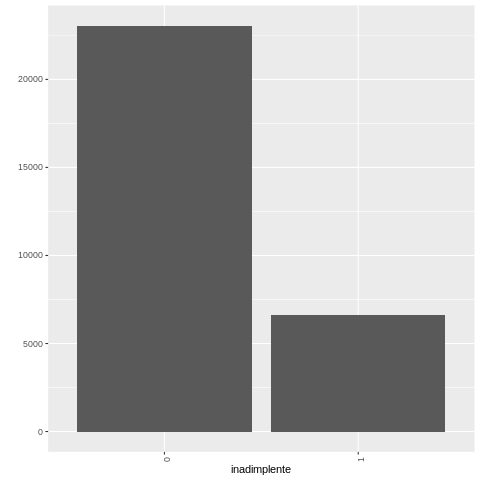

In [ ]:
# Plot da distribuição usando ggplot2
%%R
qplot(inadimplente, data = dados_clientes, geom = "bar") + 
  theme(axis.text.x = element_text(angle = 90, hjust = 1))

Nos dados, nós temos muito mais clientes que pagaram do que clientes que ficaram inadimplentes, mostrando que nossa base está desbalanceada.

In [ ]:
# Set seed
%%R
set.seed(12345)

In [ ]:
# Amostragem estratificada. 
# Seleciona as linhas de acordo com a variável inadimplente como strata
%%R
indice <- createDataPartition(dados_clientes$inadimplente, p = 0.75, list = FALSE)

In [ ]:
%%R
dim(indice)

[1] 22242     1


In [ ]:
# Definimos os dados de treinamento como subconjunto do conjunto de dados original
# com números de indice de linha (conforme identificado acima) e todas as colunas
%%R
dados_treino <- dados_clientes[indice,]

In [ ]:
%%R
dim(dados_treino)

[1] 22242    24


In [ ]:
%%R
table(dados_treino$inadimplente)


    0     1 
17284  4958 


In [ ]:
# Veja as porcentagens entre as classes
%%R
prop.table(table(dados_treino$inadimplente))


        0         1 
0.7770884 0.2229116 


In [ ]:
# Número de registros no dataset de treinamento
%%R
dim(dados_treino)

[1] 22242    24


In [ ]:
# Comparamoos as porcentagens entre as classes de treinamento e dados originais
%%R
compara_dados <- cbind(prop.table(table(dados_treino$inadimplente)), 
                       prop.table(table(dados_clientes$inadimplente)))

In [ ]:
%%R
colnames(compara_dados) <- c("Treinamento", "Original")

In [ ]:
%%R
compara_dados

  Treinamento  Original
0   0.7770884 0.7771034
1   0.2229116 0.2228966


In [ ]:
# Melt Data - Converte colunas em linhas
%%R
melt_compara_dados <- melt(compara_dados)

In [ ]:
%%R
melt_compara_dados

  X1          X2     value
1  0 Treinamento 0.7770884
2  1 Treinamento 0.2229116
3  0    Original 0.7771034
4  1    Original 0.2228966


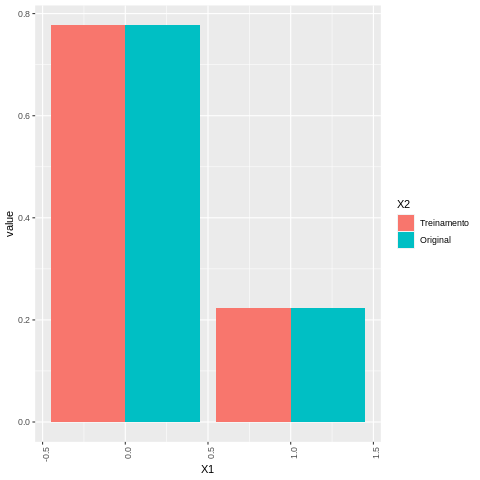

In [ ]:
# Plot para ver a distribuição do treinamento vs original
%%R
ggplot(melt_compara_dados, aes(x = X1, y = value)) + 
  geom_bar( aes(fill = X2), stat = "identity", position = "dodge") + 
  theme(axis.text.x = element_text(angle = 90, hjust = 1))

In [ ]:
# Tudo o que não está no dataset de treinamento está no dataset de teste. Observe o sinal - (menos)
%%R
dados_teste <- dados_clientes[-indice,]

In [ ]:
%%R
dim(dados_teste)

[1] 7413   24


In [ ]:
%%R
dim(dados_treino)

[1] 22242    24


In [ ]:
#################### Modelo de Machine Learning ####################

In [ ]:
# Construindo a primeira versão do modelo
%%R
head(dados_treino)

  LIMIT_BAL    Genero Escolaridade Estado_Civil  Idade PAY_0 PAY_2 PAY_3 PAY_4
2    120000  Feminino     Graduado     Solteiro  Jovem    -1     2     0     0
3     90000  Feminino     Graduado     Solteiro Adulto     0     0     0     0
4     50000  Feminino     Graduado       Casado Adulto     0     0     0     0
5     50000 Masculino     Graduado       Casado  Idoso    -1     0    -1     0
6     50000 Masculino Pos Graduado     Solteiro Adulto     0     0     0     0
7    500000 Masculino Pos Graduado     Solteiro  Jovem     0     0     0     0
  PAY_5 PAY_6 BILL_AMT1 BILL_AMT2 BILL_AMT3 BILL_AMT4 BILL_AMT5 BILL_AMT6
2     0     2      2682      1725      2682      3272      3455      3261
3     0     0     29239     14027     13559     14331     14948     15549
4     0     0     46990     48233     49291     28314     28959     29547
5     0     0      8617      5670     35835     20940     19146     19131
6     0     0     64400     57069     57608     19394     19619     20024
7  

In [ ]:
%%R
modelo_v1 <- randomForest(inadimplente ~ ., data = dados_treino)

In [ ]:
%%R
modelo_v1


Call:
 randomForest(formula = inadimplente ~ ., data = dados_treino) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 4

        OOB estimate of  error rate: 18.21%
Confusion matrix:
      0    1 class.error
0 16338  946   0.0547327
1  3105 1853   0.6262606


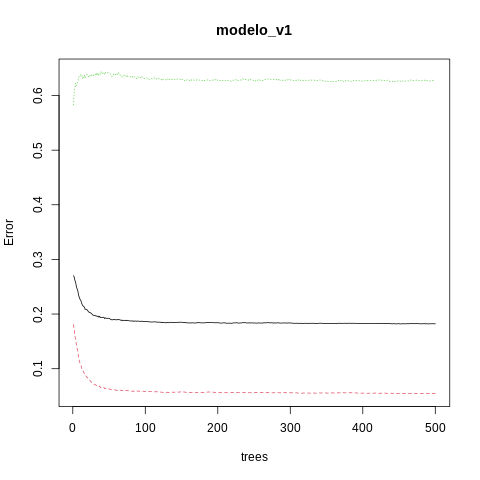

In [ ]:
# Avaliando o modelo
%%R
plot(modelo_v1)

Na primeira linha temos a performance do modelo, onde ele comeca com valor mais baixo e vai melhorando.

A linha preta é o erro onde podemos observar que o modelo começa errando muito e com a evolução, o erro diminui.



In [ ]:
# Previsões com dados de teste
%%R
previsoes_v1 <- predict(modelo_v1, dados_teste)

In [ ]:
# Confusion Matrix
%%R
cm_v1 <- caret::confusionMatrix(previsoes_v1, dados_teste$inadimplente, positive = "1")
cm_v1

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 5443 1055
         1  318  597
                                          
               Accuracy : 0.8148          
                 95% CI : (0.8058, 0.8236)
    No Information Rate : 0.7771          
    P-Value [Acc > NIR] : 1.01e-15        
                                          
                  Kappa : 0.3641          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.36138         
            Specificity : 0.94480         
         Pos Pred Value : 0.65246         
         Neg Pred Value : 0.83764         
             Prevalence : 0.22285         
         Detection Rate : 0.08053         
   Detection Prevalence : 0.12343         
      Balanced Accuracy : 0.65309         
                                          
       'Positive' Class : 1               
                        

O modelo tem uma boa acurácia (81%), porém classificou 1055 que pagaram em não pagantes. Isso pode causar problemas para a instituição. Vamos tentar balancear as classes e melhorar essas classificações.

In [ ]:
# Calculando Precision, Recall e F1-Score, métricas de avaliação do modelo preditivo
%%R
y <- dados_teste$inadimplente
y_pred_v1 <- previsoes_v1

In [ ]:
%%R
precision <- posPredValue(y_pred_v1, y)
precision

[1] 0.8376424


In [ ]:
%%R
recall <- sensitivity(y_pred_v1, y)
recall

[1] 0.9448012


In [ ]:
%%R
F1 <- (2 * precision * recall) / (precision + recall)
F1

[1] 0.8880007


In [ ]:
# Balanceamento de classe
%%R
install.packages('abind')
install.packages('zoo')
install.packages('xts')
install.packages('quantmod')
install.packages('ROCR')

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/abind_1.4-5.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 21810 bytes (21 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to

In [ ]:
%%R
install.packages( "https://cran.r-project.org/src/contrib/Archive/DMwR/DMwR_0.4.1.tar.gz", repos=NULL, type="source" )

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.r-project.org/src/contrib/Archive/DMwR/DMwR_0.4.1.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 1941361 bytes (1.9 MB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to conso

In [ ]:
%%R
library(DMwR)

R[write to console]: Loading required package: grid

R[write to console]: 
Attaching package: ‘DMwR’


R[write to console]: The following objects are masked from ‘package:DMwR2’:

    .Eq, .St, algae, algae.sols, centralImputation, centralValue, GSPC,
    kNN, knnImputation, lofactor, manyNAs, outliers.ranking, rpartXse,
    rt.prune, sales, SelfTrain, sigs.PR, SoftMax, test.algae,
    tradeRecord, trading.signals, trading.simulator, tradingEvaluation




In [ ]:
# Aplicando o SMOTE - SMOTE: Synthetic Minority Over-sampling Technique
# https://arxiv.org/pdf/1106.1813.pdf
%%R
table(dados_treino$inadimplente)


    0     1 
17284  4958 


In [ ]:
%%R
prop.table(table(dados_treino$inadimplente))


        0         1 
0.7770884 0.2229116 


In [ ]:
%%R
set.seed(9560)

In [ ]:
%%R
dados_treino_bal <- SMOTE(inadimplente ~ ., data  = dados_treino)                         
table(dados_treino_bal$inadimplente)


    0     1 
19832 14874 


In [ ]:
%%R
prop.table(table(dados_treino_bal$inadimplente))


        0         1 
0.5714286 0.4285714 


In [ ]:
# Construindo a segunda versão do modelo
%%R
modelo_v2 <- randomForest(inadimplente ~ ., data = dados_treino_bal)
modelo_v2


Call:
 randomForest(formula = inadimplente ~ ., data = dados_treino_bal) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 4

        OOB estimate of  error rate: 10.13%
Confusion matrix:
      0     1 class.error
0 19005   827  0.04170028
1  2690 12184  0.18085249


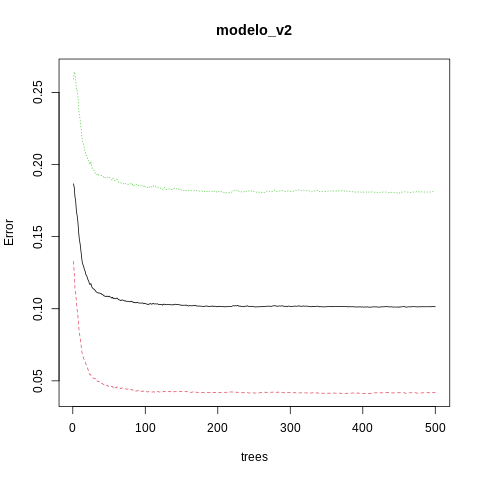

In [ ]:
# Avaliando o modelo
%%R
plot(modelo_v2)

In [ ]:
# Previsões com dados de teste
%%R
previsoes_v2 <- predict(modelo_v2, dados_teste)

In [ ]:
# Confusion Matrix
%%R
cm_v2 <- caret::confusionMatrix(previsoes_v2, dados_teste$inadimplente, positive = "1")
cm_v2

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 5044  811
         1  717  841
                                         
               Accuracy : 0.7939         
                 95% CI : (0.7845, 0.803)
    No Information Rate : 0.7771         
    P-Value [Acc > NIR] : 0.0002545      
                                         
                  Kappa : 0.3926         
                                         
 Mcnemar's Test P-Value : 0.0173528      
                                         
            Sensitivity : 0.5091         
            Specificity : 0.8755         
         Pos Pred Value : 0.5398         
         Neg Pred Value : 0.8615         
             Prevalence : 0.2229         
         Detection Rate : 0.1134         
   Detection Prevalence : 0.2102         
      Balanced Accuracy : 0.6923         
                                         
       'Positive' Class : 1              
                                         


In [ ]:
# Calculando Precision, Recall e F1-Score, métricas de avaliação do modelo preditivo
%%R
y <- dados_teste$inadimplente
y_pred_v2 <- previsoes_v2

In [ ]:
%%R
precision <- posPredValue(y_pred_v2, y)
precision

[1] 0.8614859


In [ ]:
%%R
recall <- sensitivity(y_pred_v2, y)
recall

[1] 0.8755424


In [ ]:
%%R
F1 <- (2 * precision * recall) / (precision + recall)
F1

[1] 0.8684573


In [ ]:
# Importância das variáveis preditoras para as previsões
%%R
head(dados_treino_bal)

      LIMIT_BAL    Genero Escolaridade Estado_Civil  Idade PAY_0 PAY_2 PAY_3
10123     50000 Masculino Ensino Medio     Solteiro  Jovem     0     0     0
634      210000  Feminino     Graduado       Casado Adulto    -2    -2    -2
23633    210000  Feminino Ensino Medio     Solteiro Adulto    -1    -1    -1
26684     30000 Masculino Pos Graduado     Solteiro  Jovem     0     0     0
16998    130000  Feminino     Graduado     Solteiro  Jovem    -2    -2    -2
9491      50000  Feminino     Graduado       Casado  Jovem     0     0     0
      PAY_4 PAY_5 PAY_6 BILL_AMT1 BILL_AMT2 BILL_AMT3 BILL_AMT4 BILL_AMT5
10123    -1    -1    -1      7965      8404     10240       170      -220
634      -2    -2    -2         0         0         0         0         0
23633    -2    -2    -2      7605      1170         0         0         0
26684     2     0     0     28436     28845     31071     30248     30354
16998    -2    -2    -2      -169      3464      7569      8130       544
9491      0     0

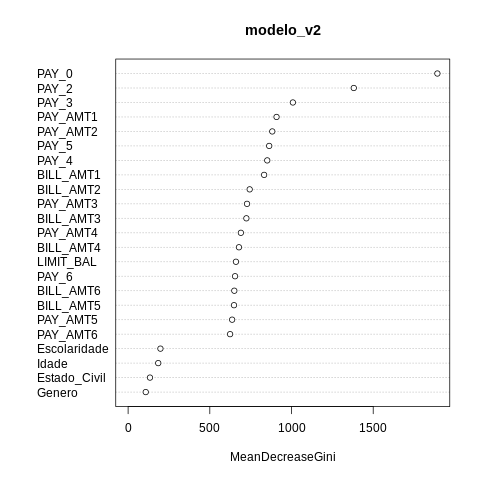

In [ ]:
%%R
varImpPlot(modelo_v2)

In [ ]:
# Obtendo as variáveis mais importantes
%%R
imp_var <- importance(modelo_v2)
varImportance <- data.frame(Variables = row.names(imp_var), 
                            Importance = round(imp_var[ ,'MeanDecreaseGini'],2))

In [ ]:
# Criando o rank de variáveis baseado na importância
%%R
rankImportance <- varImportance %>% 
  mutate(Rank = paste0('#', dense_rank(desc(Importance))))

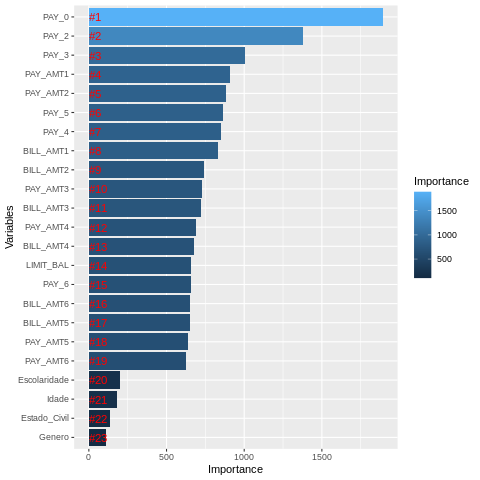

In [ ]:
# Usando ggplot2 para visualizar a importância relativa das variáveis
%%R
ggplot(rankImportance, 
       aes(x = reorder(Variables, Importance), 
           y = Importance, 
           fill = Importance)) + 
  geom_bar(stat='identity') + 
  geom_text(aes(x = Variables, y = 0.5, label = Rank), 
            hjust = 0, 
            vjust = 0.55, 
            size = 4, 
            colour = 'red') +
  labs(x = 'Variables') +
  coord_flip() 

In [ ]:
# Construindo a terceira versão do modelo apenas com as variáveis mais importantes
%%R
colnames(dados_treino_bal)

 [1] "LIMIT_BAL"    "Genero"       "Escolaridade" "Estado_Civil" "Idade"       
 [6] "PAY_0"        "PAY_2"        "PAY_3"        "PAY_4"        "PAY_5"       
[11] "PAY_6"        "BILL_AMT1"    "BILL_AMT2"    "BILL_AMT3"    "BILL_AMT4"   
[16] "BILL_AMT5"    "BILL_AMT6"    "PAY_AMT1"     "PAY_AMT2"     "PAY_AMT3"    
[21] "PAY_AMT4"     "PAY_AMT5"     "PAY_AMT6"     "inadimplente"


In [ ]:
%%R
modelo_v3 <- randomForest(inadimplente ~ PAY_0 + PAY_2 + PAY_3 + PAY_AMT1 + PAY_AMT2 + PAY_5 + BILL_AMT1, 
                          data = dados_treino_bal)
modelo_v3


Call:
 randomForest(formula = inadimplente ~ PAY_0 + PAY_2 + PAY_3 +      PAY_AMT1 + PAY_AMT2 + PAY_5 + BILL_AMT1, data = dados_treino_bal) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 2

        OOB estimate of  error rate: 13.59%
Confusion matrix:
      0     1 class.error
0 18844   988  0.04981848
1  3727 11147  0.25057147


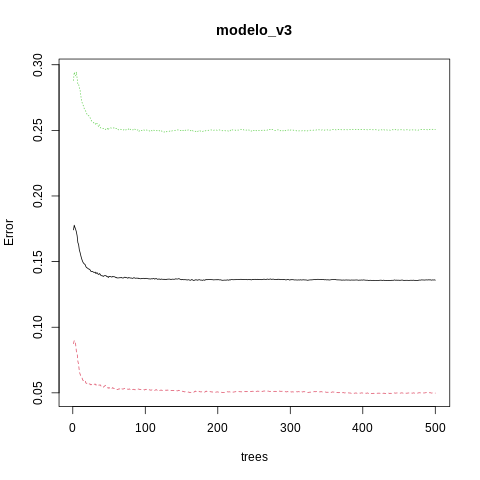

In [ ]:
# Avaliando o modelo
%%R
plot(modelo_v3)

In [ ]:
# Previsões com dados de teste
%%R
previsoes_v3 <- predict(modelo_v3, dados_teste)

In [ ]:
# Confusion Matrix
%%R
cm_v3 <- caret::confusionMatrix(previsoes_v3, dados_teste$inadimplente, positive = "1")
cm_v3

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 5205  945
         1  556  707
                                          
               Accuracy : 0.7975          
                 95% CI : (0.7882, 0.8066)
    No Information Rate : 0.7771          
    P-Value [Acc > NIR] : 1.092e-05       
                                          
                  Kappa : 0.3618          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.42797         
            Specificity : 0.90349         
         Pos Pred Value : 0.55978         
         Neg Pred Value : 0.84634         
             Prevalence : 0.22285         
         Detection Rate : 0.09537         
   Detection Prevalence : 0.17038         
      Balanced Accuracy : 0.66573         
                                          
       'Positive' Class : 1               
                        

In [ ]:
# Calculando Precision, Recall e F1-Score, métricas de avaliação do modelo preditivo
%%R
y <- dados_teste$inadimplente
y_pred_v3 <- previsoes_v3

In [ ]:
%%R
precision <- posPredValue(y_pred_v3, y)
precision

[1] 0.8463415


In [ ]:
%%R
recall <- sensitivity(y_pred_v3, y)
recall

[1] 0.903489


In [ ]:
%%R
F1 <- (2 * precision * recall) / (precision + recall)
F1

[1] 0.873982


In [ ]:
# Salvando o modelo em disco
%%R
saveRDS(modelo_v3, file = "modelo_v3.rds")

In [ ]:
# Carregando o modelo
%%R
modelo_final <- readRDS("modelo_v3.rds")

In [ ]:
# Previsões com novos dados de 3 clientes

# Dados dos clientes
%%R
PAY_0 <- c(0, 0, 0) 
PAY_2 <- c(0, 0, 0) 
PAY_3 <- c(1, 0, 0) 
PAY_AMT1 <- c(1100, 1000, 1200) 
PAY_AMT2 <- c(1500, 1300, 1150) 
PAY_5 <- c(0, 0, 0) 
BILL_AMT1 <- c(350, 420, 280) 

In [ ]:
# Concatena em um dataframe
%%R
novos_clientes <- data.frame(PAY_0, PAY_2, PAY_3, PAY_AMT1, PAY_AMT2, PAY_5, BILL_AMT1)
head(novos_clientes)

  PAY_0 PAY_2 PAY_3 PAY_AMT1 PAY_AMT2 PAY_5 BILL_AMT1
1     0     0     1     1100     1500     0       350
2     0     0     0     1000     1300     0       420
3     0     0     0     1200     1150     0       280


In [ ]:
# Checando os tipos de dados
%%R
str(dados_treino_bal)
str(novos_clientes)

'data.frame':	34706 obs. of  24 variables:
 $ LIMIT_BAL   : num  50000 210000 210000 30000 130000 50000 200000 50000 20000 50000 ...
 $ Genero      : Factor w/ 2 levels "Masculino","Feminino": 1 2 2 1 2 2 2 2 2 1 ...
 $ Escolaridade: Factor w/ 4 levels "Pos Graduado",..: 3 2 3 1 2 2 1 2 2 2 ...
 $ Estado_Civil: Factor w/ 4 levels "Desconhecido",..: 3 2 3 3 3 2 3 3 2 3 ...
 $ Idade       : Factor w/ 3 levels "Jovem","Adulto",..: 1 2 2 1 1 1 2 1 1 3 ...
 $ PAY_0       : Factor w/ 11 levels "-2","-1","0",..: 3 1 2 3 1 3 3 2 3 3 ...
 $ PAY_2       : Factor w/ 11 levels "-2","-1","0",..: 3 1 2 3 1 3 3 2 3 3 ...
 $ PAY_3       : Factor w/ 11 levels "-2","-1","0",..: 3 1 2 3 1 3 1 2 5 3 ...
 $ PAY_4       : Factor w/ 11 levels "-2","-1","0",..: 2 1 1 5 1 3 1 2 6 3 ...
 $ PAY_5       : Factor w/ 10 levels "-2","-1","0",..: 2 1 1 3 1 3 1 2 5 4 ...
 $ PAY_6       : Factor w/ 10 levels "-2","-1","0",..: 2 1 1 3 1 3 1 2 4 3 ...
 $ BILL_AMT1   : num  7965 0 7605 28436 -169 ...
 $ BILL_AMT2   : num 

In [ ]:
# Convertendo os tipos de dados
%%R
novos_clientes$PAY_0 <- factor(novos_clientes$PAY_0, levels = levels(dados_treino_bal$PAY_0))
novos_clientes$PAY_2 <- factor(novos_clientes$PAY_2, levels = levels(dados_treino_bal$PAY_2))
novos_clientes$PAY_3 <- factor(novos_clientes$PAY_3, levels = levels(dados_treino_bal$PAY_3))
novos_clientes$PAY_5 <- factor(novos_clientes$PAY_5, levels = levels(dados_treino_bal$PAY_5))
str(novos_clientes)

'data.frame':	3 obs. of  7 variables:
 $ PAY_0    : Factor w/ 11 levels "-2","-1","0",..: 3 3 3
 $ PAY_2    : Factor w/ 11 levels "-2","-1","0",..: 3 3 3
 $ PAY_3    : Factor w/ 11 levels "-2","-1","0",..: 4 3 3
 $ PAY_AMT1 : num  1100 1000 1200
 $ PAY_AMT2 : num  1500 1300 1150
 $ PAY_5    : Factor w/ 10 levels "-2","-1","0",..: 3 3 3
 $ BILL_AMT1: num  350 420 280


In [ ]:
# Previsões
%%R
previsoes_novos_clientes <- predict(modelo_final, novos_clientes)
head(previsoes_novos_clientes)

1 2 3 
1 0 0 
Levels: 0 1
